In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/higgs-boson/training.zip
/kaggle/input/higgs-boson/HiggsBosonCompetition_AMSMetric_rev1.py
/kaggle/input/higgs-boson/random_submission.zip
/kaggle/input/higgs-boson/test.zip


In [2]:
!unzip /kaggle/input/higgs-boson/training.zip

Archive:  /kaggle/input/higgs-boson/training.zip
  inflating: training.csv            


In [3]:
!unzip /kaggle/input/higgs-boson/test.zip

Archive:  /kaggle/input/higgs-boson/test.zip
  inflating: test.csv                


In [4]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_train= pd.read_csv("training.csv")
df_test = pd.read_csv("test.csv")

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [7]:
df_train.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      550000 non-null  int64  
 1   DER_mass_MMC                 550000 non-null  float64
 2   DER_mass_transverse_met_lep  550000 non-null  float64
 3   DER_mass_vis                 550000 non-null  float64
 4   DER_pt_h                     550000 non-null  float64
 5   DER_deltaeta_jet_jet         550000 non-null  float64
 6   DER_mass_jet_jet             550000 non-null  float64
 7   DER_prodeta_jet_jet          550000 non-null  float64
 8   DER_deltar_tau_lep           550000 non-null  float64
 9   DER_pt_tot                   550000 non-null  float64
 10  DER_sum_pt                   550000 non-null  float64
 11  DER_pt_ratio_lep_tau         550000 non-null  float64
 12  DER_met_phi_centrality       550000 non-null  float64
 13 

In [9]:
df_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [10]:
df_train["Label"].replace(('s','b'),(1,0),inplace=True)

In [11]:
df_sig = df_train[df_train.Label==1]
df_bkg = df_train[df_train.Label==0]

In [12]:
df_sig.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,1
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,1
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,...,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.018636,1
9,100009,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,...,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.001502,1
15,100015,111.026,32.096,75.271,23.067,-999.000,-999.000,-999.000,3.205,23.067,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.018636,1


In [13]:
PRINames = ["PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta",
            "PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt",
            "PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt",
            "PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt"]
DERNames = ["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h",
            "DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet",
            "DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau",
            "DER_met_phi_centrality","DER_lep_eta_centrality"]

In [14]:
VarNames = ['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label']

In [15]:
print(len(PRINames),len(DERNames))

17 13


In [16]:
print(df_train.shape)
print(df_sig.shape)
print(df_bkg.shape)

(250000, 33)
(85667, 33)
(164333, 33)


In [17]:
df_train.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767,0.342668
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103,0.474603
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188,0.000000
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128,1.000000
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543,1.000000


In [18]:
df_sig.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
count,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,...,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.0
mean,225224.207279,85.568853,32.036287,80.387179,74.869878,-619.259794,-426.480218,-621.167191,2.386378,18.445728,...,1.159968,-231.992190,-297.275085,-297.282305,-598.857487,-620.415028,-620.416985,91.295672,0.008078,1.0
std,72142.681607,202.476222,30.157585,21.457651,74.262307,486.123573,794.338643,483.686830,0.688971,23.585736,...,0.941634,502.046188,456.737043,456.731835,512.524404,484.645297,484.642048,98.670344,0.008231,0.0
min,100000.000000,-999.000000,0.000000,7.520000,0.000000,-999.000000,-999.000000,-999.000000,0.264000,0.000000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.001502,1.0
25%,162688.500000,105.592000,10.364000,67.382500,23.462500,-999.000000,-999.000000,-999.000000,1.874500,2.796000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001503,1.0
50%,225474.000000,120.553000,24.403000,79.386000,54.376000,-999.000000,-999.000000,-999.000000,2.526000,10.651000,...,1.000000,53.294000,-1.387000,-1.348000,-999.000000,-999.000000,-999.000000,68.038000,0.001503,1.0
75%,287693.500000,134.739000,45.729000,91.936000,105.466500,1.965000,199.464500,-3.381000,2.968000,27.225000,...,2.000000,93.771500,0.943500,0.884000,41.273000,-1.327000,-1.035000,138.575000,0.018636,1.0
max,349997.000000,977.333000,570.115000,789.538000,2834.999000,8.503000,4974.979000,16.648000,5.208000,2834.999000,...,3.000000,738.235000,4.499000,3.141000,421.566000,4.500000,3.141000,1193.476000,0.018636,1.0


In [19]:
df_bkg.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
count,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,...,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.0
mean,224882.359812,-119.186024,58.208042,81.596313,49.047438,-754.900355,-692.338008,-755.329855,2.366178,19.163180,...,0.884929,-408.976389,-452.416215,-452.420779,-741.135235,-755.364462,-755.358911,63.560706,2.501018,0.0
std,72182.548555,464.171448,34.520722,47.911004,55.326307,429.806453,552.692423,429.051909,0.827583,21.553753,...,0.982473,538.515064,497.276878,497.273065,454.372939,428.989649,428.999436,96.314127,1.794235,0.0
min,100001.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.064061,0.0
25%,162395.000000,53.224000,31.362000,55.532000,8.360000,-999.000000,-999.000000,-999.000000,1.774000,2.866000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,1.340468,0.0
50%,224760.000000,92.126000,60.812000,69.705000,32.880000,-999.000000,-999.000000,-999.000000,2.472000,13.346000,...,1.000000,33.418000,-2.299000,-2.596000,-999.000000,-999.000000,-999.000000,33.620000,2.080362,0.0
75%,287401.000000,122.460000,80.248000,92.716000,65.653000,-999.000000,-999.000000,-999.000000,2.957000,27.793000,...,1.000000,64.396000,0.193000,0.245000,-999.000000,-999.000000,-999.000000,89.782000,4.353313,0.0
max,349999.000000,1192.026000,690.075000,1349.351000,1053.807000,7.888000,4062.147000,16.690000,5.684000,466.525000,...,3.000000,1120.573000,4.492000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543,0.0


#### Training set synopsis:
Number of observations:  250000,
Number of columns:  33,
Number of integer columns:  2,
Number of float columns:  30,
Number of object columns:  1,
Memory Usage:  62.94 MB

#### Test set synopsis:
Number of observations:  550000,
Number of columns:  31,
Number of integer columns:  2,
Number of float columns:  29,
Number of object columns:  0,
Memory Usage:  130.08 MB

In [20]:
n_train = 200000
train_sample = df_train[:n_train]
test_sample = df_train[n_train:]

X_train=train_sample[VarNames[1:-2]]
y_train=train_sample["Label"]

X_test=test_sample[VarNames[1:-2]]
y_test=test_sample["Label"]

In [21]:
X_train

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
4,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,106.903,40.388,73.667,34.330,-999.000,-999.000,-999.000,2.585,2.920,106.406,...,-0.395,127.711,1,31.540,0.051,2.081,-999.000,-999.000,-999.000,31.540
199996,94.234,6.832,61.460,350.908,-999.000,-999.000,-999.000,0.595,22.743,567.102,...,3.135,502.236,1,344.027,-1.700,-0.090,-999.000,-999.000,-999.000,344.027
199997,125.434,61.907,63.846,64.459,5.623,785.537,-7.877,2.446,14.875,160.392,...,-0.808,151.439,2,54.083,-2.974,1.611,41.325,2.649,2.863,95.408
199998,-999.000,81.478,55.073,0.283,-999.000,-999.000,-999.000,2.145,0.283,64.974,...,0.205,77.391,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000


In [22]:
y_train

0         1
1         0
2         0
3         0
4         0
         ..
199995    1
199996    0
199997    1
199998    0
199999    0
Name: Label, Length: 200000, dtype: int64

In [23]:
test_sig = test_sample[test_sample.Label==1] #signal
test_bkg = test_sample[test_sample.Label==0] #background

In [24]:
test_sig.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
200002,300002,115.712,65.683,83.738,39.192,2.150,516.497,-0.995,2.734,29.765,...,2,186.458,-0.674,0.130,133.620,1.477,3.097,320.079,0.001502,1
200005,300005,112.382,18.841,80.552,69.275,0.975,92.444,-0.120,2.341,1.598,...,2,54.286,-0.145,2.239,47.138,0.830,0.553,101.425,0.001502,1
200009,300009,138.595,11.367,104.537,110.693,6.411,1524.608,-9.532,1.711,1.228,...,2,125.322,-2.344,-1.849,30.424,4.067,2.270,155.747,0.001503,1
200015,300015,100.098,37.131,79.859,0.242,-999.000,-999.000,-999.000,2.715,0.242,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.001503,1
200020,300020,121.046,21.264,89.054,101.347,-999.000,-999.000,-999.000,2.177,4.994,...,1,96.500,-2.081,0.069,-999.000,-999.000,-999.000,96.500,0.018636,1


## data visualization and pairplot

In [25]:
def pairplot(data_sig,data_bkg):
    fig,axs= plt.subplots(7,5)
    fig.set_figheight(16)
    fig.set_figwidth(18)
    i=0
    j=0
    for var in data_sig.columns:
        if j==5:
            i=i+1
            j=0

        axs[i,j].hist(data_sig[var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        axs[i,j].hist(data_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        axs[i,j].set_title(var)
        axs[i,j].legend(loc='upper right')
        
        j+=1
    [fig.delaxes(axs) for axs in axs.flatten() if not axs.has_data()]
    fig.tight_layout()

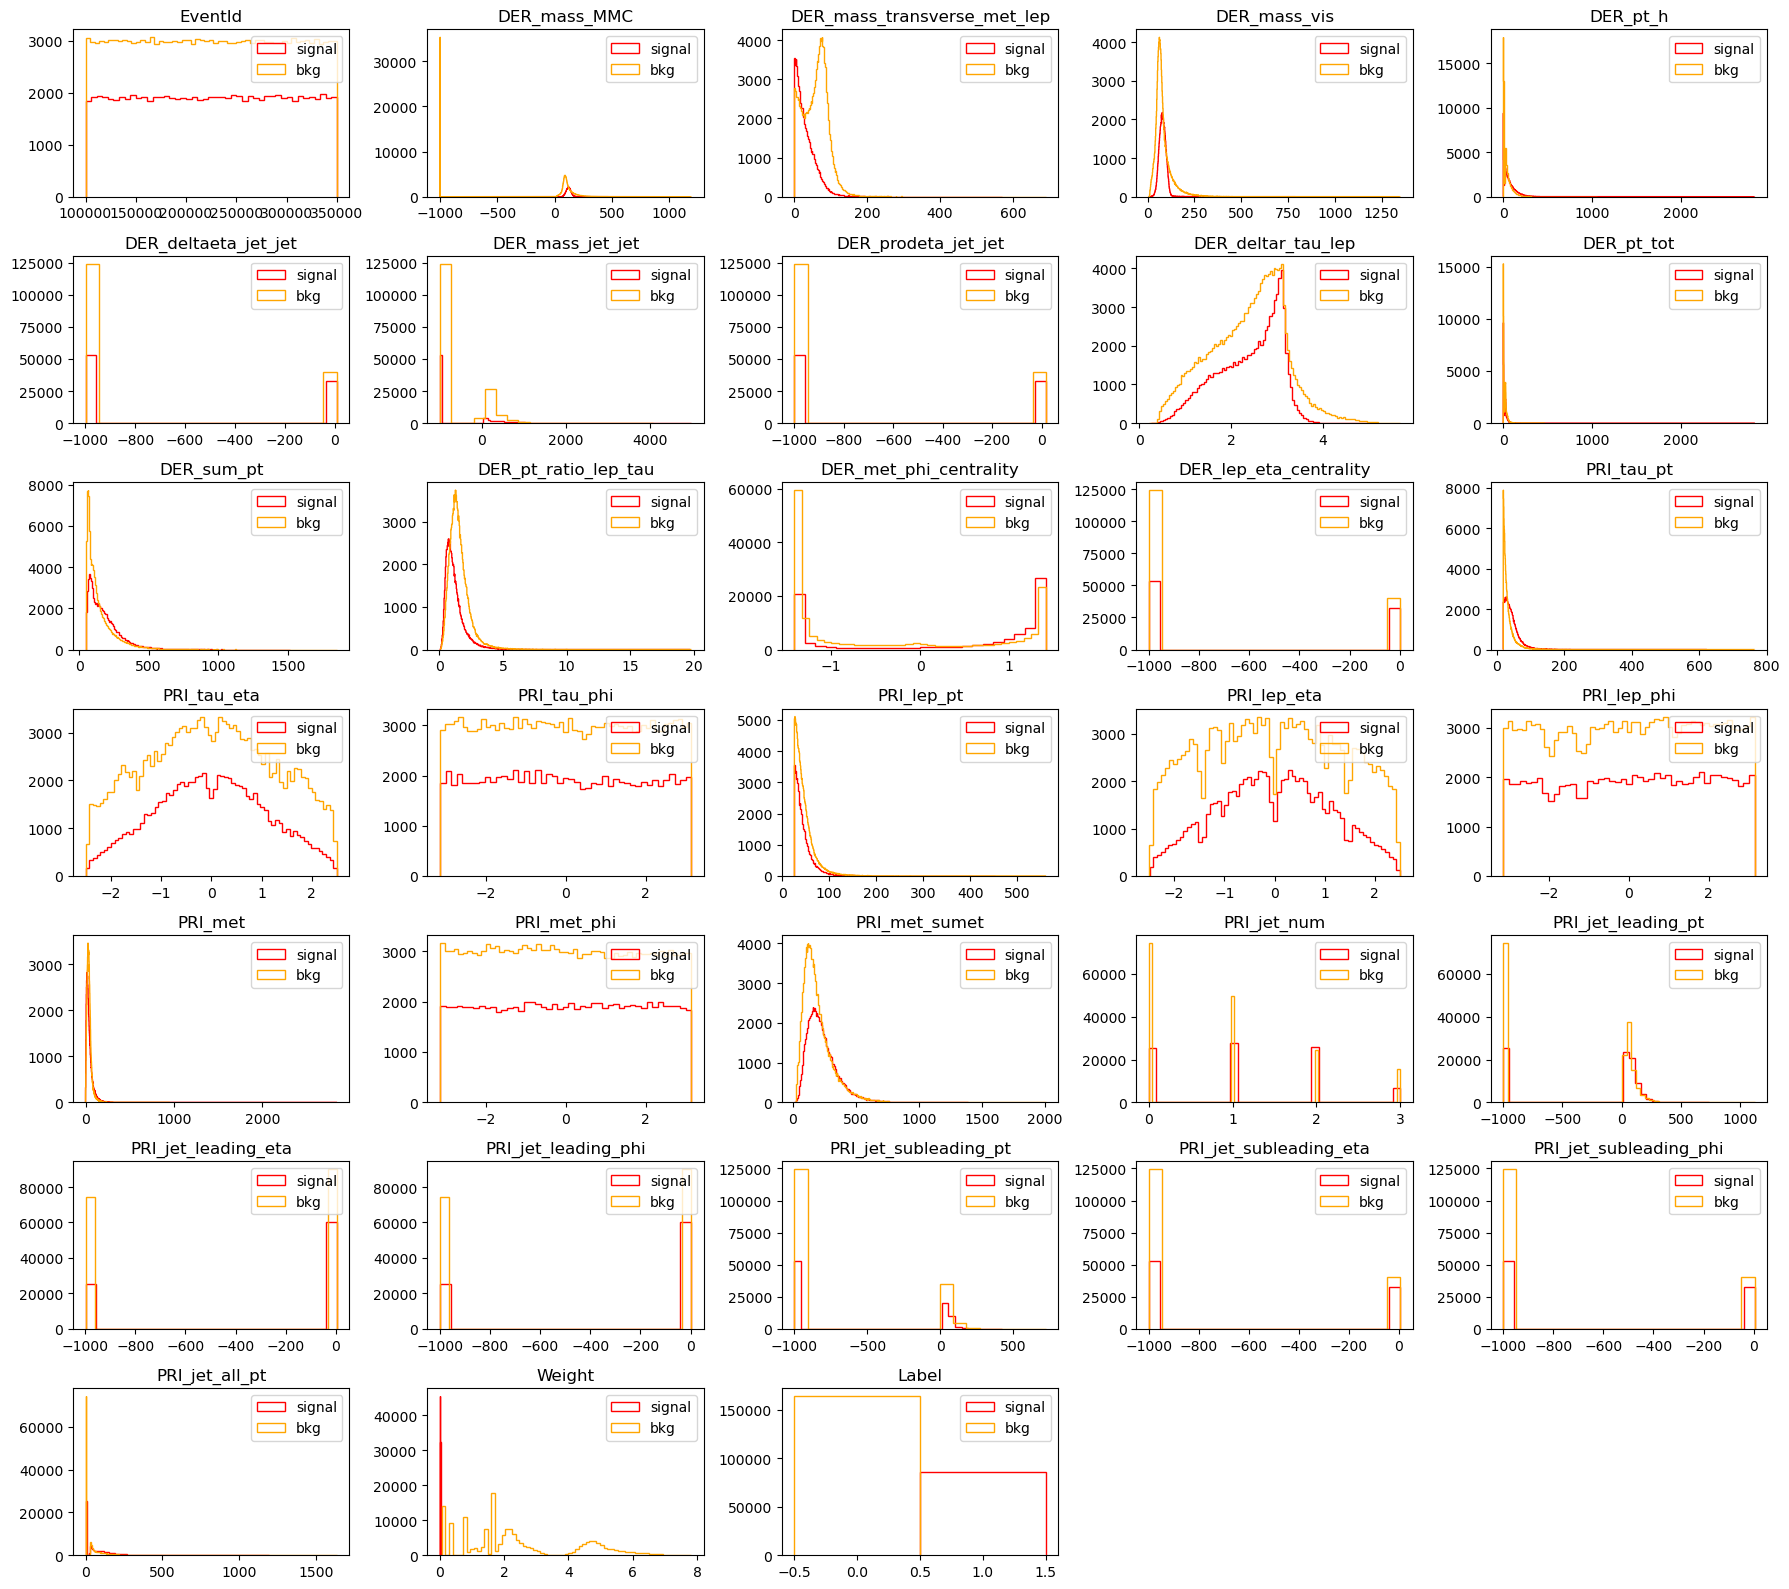

In [26]:
pairplot(df_sig,df_bkg)

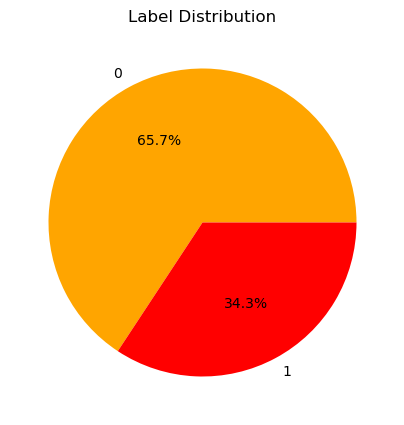

In [27]:
label_counts = df_train['Label'].value_counts()

plt.figure(figsize=(5, 5))
colors = ['orange', 'red'] 
plt.pie(label_counts.values, labels=label_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Label Distribution')

plt.show()

## EDA

In [28]:
print(df_train["Weight"].max())
print(df_train["Weight"].min())

7.82254254503
0.00150187015894


## Using XGBoost

#### (Feature set contains all columns except EventID, Weight and Label, while the target set is just the Label column)

In [29]:
X_train.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [30]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 200000 entries, 0 to 199999
Series name: Label
Non-Null Count   Dtype
--------------   -----
200000 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


## Using a naive Bayes classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [32]:
clf = GaussianNB()

In [33]:
clf.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = clf.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6754


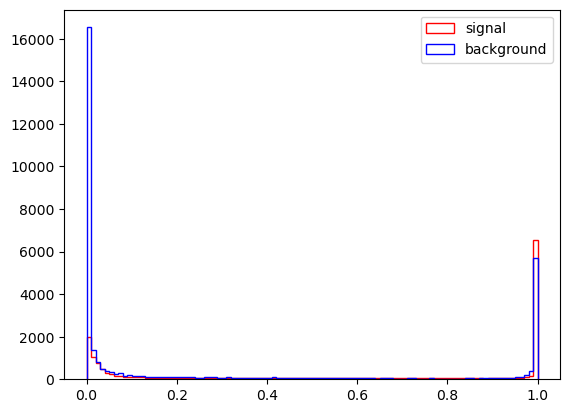

In [36]:
plt.figure()
plt.hist(clf.predict_proba(test_sig[VarNames[1:-2]])[:,1],bins=100,histtype="step", color='r', label="signal",stacked=True)
plt.hist(clf.predict_proba(test_bkg[VarNames[1:-2]])[:,1],bins=100,histtype="step", color='b', label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

In [37]:
fpr_b, tpr_b, threshold_b = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
auc_b = auc(fpr_b, tpr_b)

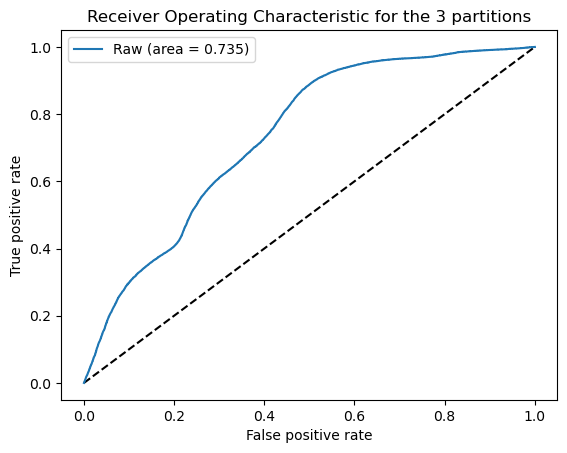

In [38]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic for the 3 partitions')
plt.plot(fpr_b, tpr_b, label='Raw (area = {:.3f})'.format(auc_b))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()

## Using XGBoost

In [39]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

In [40]:
estimators = [
    ('clf',XGBClassifier(random_state=2))
]
pipe=Pipeline(steps=estimators)
pipe

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=2, ...))])

In [41]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [42]:
search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001,1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5,1.0),
    'clf__colsample_bytree': Real(0.5,1.0),
    'clf__colsample_bylevel': Real(0.5,1.0),
    'clf__colsample_bynode': Real(0.5,1.0),
    'clf__reg_alpha': Real(0.0,10.0),
    'clf__reg_lambda': Real(0.0,10.0),
    'clf__gamma': Real(0.0,10.0)
}

In [43]:
opt = BayesSearchCV(pipe,search_space,cv=3,n_iter=10,scoring='roc_auc',random_state=2)

In [44]:
opt.fit(X_train,y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None, gpu_id=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       interaction_constraints=...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [45]:
opt.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.7083495421004318,
                               colsample_bynode=0.533518108796198,
                               colsample_bytree=0.7219127292377703,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=6.84788887069859,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.20963707988584349, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=2, ...))])

In [46]:
opt.best_score_

0.9087674910982017

In [47]:
opt.score(X_test,y_test)

0.9105115379502274

In [48]:
opt.best_estimator_.steps

[('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.7083495421004318,
                colsample_bynode=0.533518108796198,
                colsample_bytree=0.7219127292377703, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=6.84788887069859, gpu_id=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=0.20963707988584349, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=7, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=2, ...))]

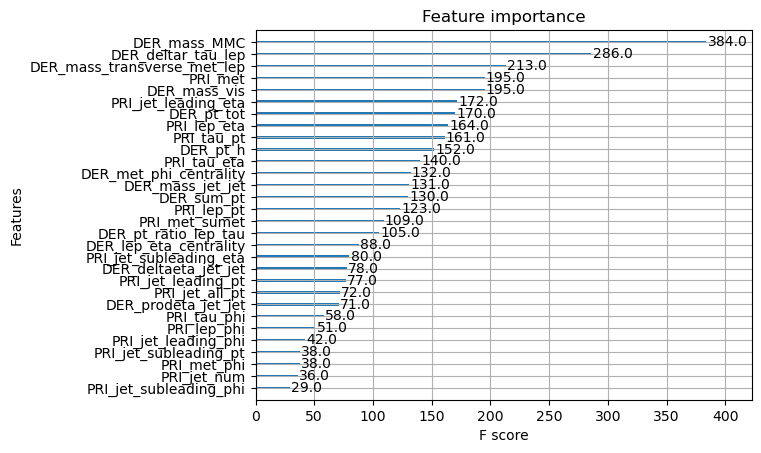

In [49]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[0]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)
plt.show()

In [50]:
y_probs = opt.predict_proba(X_test)[:, 1]

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

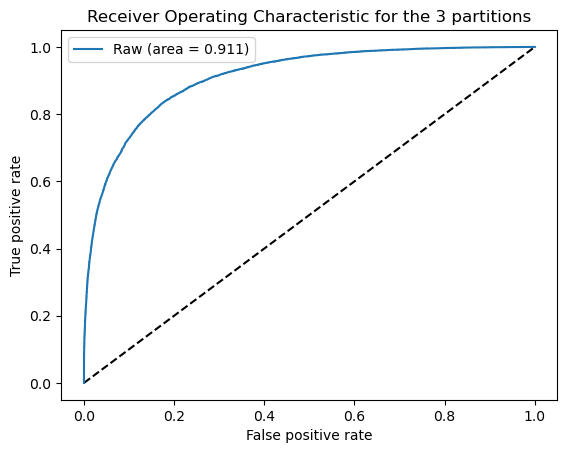

In [59]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic for the 3 partitions')
plt.plot(fpr, tpr, label='Raw (area = {:.3f})'.format(roc_auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()

In [60]:
y_pred = opt.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8410
